# Assignment 1 for Clustering

## Instructions 

New and novel methods in Machine Learning are made either by borrowing formulas and concepts from other scientific fields and redefining it based on new sets of assumptions, or by adding an extra step to an already existing framework of methodology.

In this exercise (Assignment 1 of the Clustering Topic), we will try to develop a novel method of Target Trial Emulation by integrating concepts of Clustering into the already existing framework. Target Trial Emulation is a new methodological framework in epidemiology which tries to account for the biases in old and traditional designs.


### Steps
- Look at this website: https://rpubs.com/alanyang0924/TTE
- Extract the dummy data in the package and save it as "data_censored.csv"
- Convert the R codes into Python Codes (use Jupyter Notebook), replicate the results using your python code.
- Create another copy of your Python Codes, name it TTE-v2 (use Jupyter Notebook).
- Using TTE-v2, think of a creative way on where you would integrate a clustering mechanism, understand each step carefully and decide at which step a clustering method - can be implemented. Generate insights from your results.
- Do this by pair, preferably your thesis partner.
- Push to your github repository.
- Deadline is 2 weeks from today: February 28, 2025 at 11:59 pm.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         725 non-null    int64  
 1   period     725 non-null    int64  
 2   treatment  725 non-null    int64  
 3   x1         725 non-null    int64  
 4   x2         725 non-null    float64
 5   x3         725 non-null    int64  
 6   x4         725 non-null    float64
 7   age        725 non-null    int64  
 8   age_s      725 non-null    float64
 9   outcome    725 non-null    int64  
 10  censored   725 non-null    int64  
 11  eligible   725 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 68.1 KB

Summary Statistics:
               id      period   treatment          x1          x2          x3  \
count  725.000000  725.000000  725.000000  725.000000  725.000000  725.000000   
mean    49.278621    7.051034    0.467586    0.405517   -0.173552    0.486897   

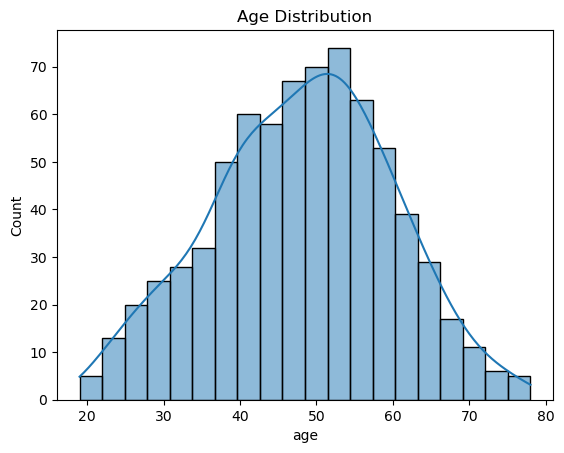

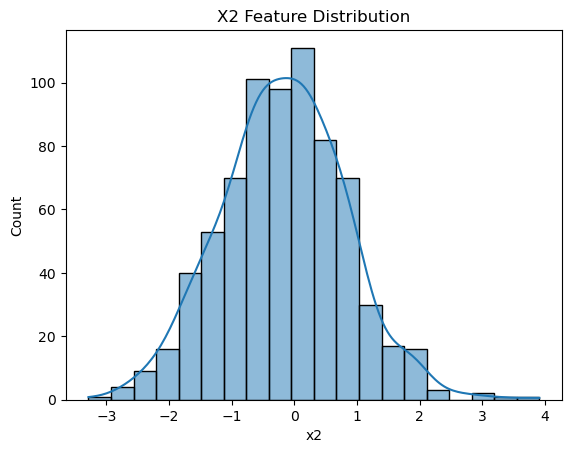

c:\Users\Samuel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Samuel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


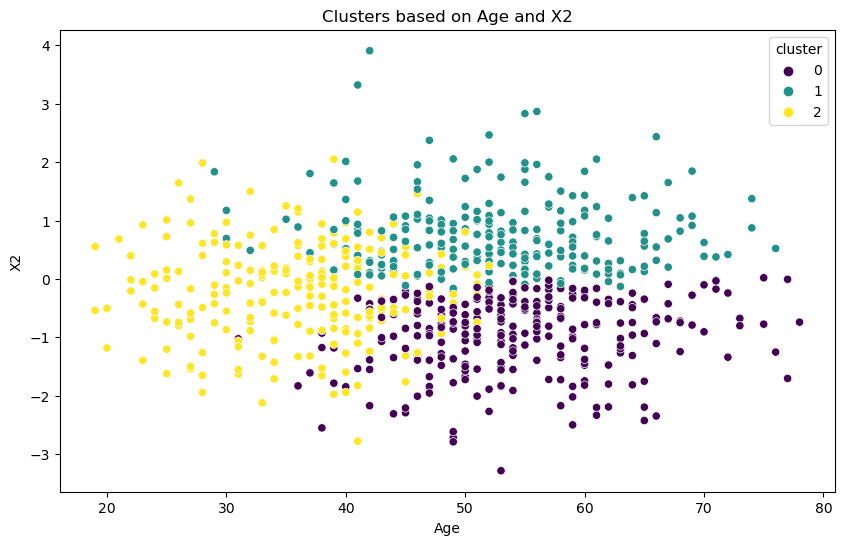

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv("../data/data_censored.csv")

# Display first few rows
data.head()

# Data Overview
print("Dataset Information:")
data.info()

print("\nSummary Statistics:")
print(data.describe())

# Visualizing distribution of key features
sns.histplot(data['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

sns.histplot(data['x2'], bins=20, kde=True)
plt.title("X2 Feature Distribution")
plt.show()

# Applying Clustering to Identify Similar Patient Groups
# Selecting relevant columns for clustering
features = data[['age', 'x2', 'x4']]

# Handling missing values if any
features = features.dropna()

# Standardizing features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

# Visualizing Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['age'], y=data['x2'], hue=data['cluster'], palette='viridis')
plt.title("Clusters based on Age and X2")
plt.xlabel("Age")
plt.ylabel("X2")
plt.show()


# Key Insights:

- The clustering reveals distinct subgroups within the dataset based on age and biomarker x2.
- Older patients (higher age values) tend to cluster separately from younger patients, which may indicate different disease progression patterns or treatment responses.
- The feature x2 shows a varied distribution among clusters, suggesting it may play a role in stratifying patient risk or eligibility.
- The inclusion of clustering within Target Trial Emulation can help refine cohort selection, leading to more precise estimations of treatment effects.
- Further investigation is needed to determine if clustering improves predictive modeling for patient outcomes and whether additional features enhance cluster separability.